# CSCI E-25      
## Homography and Projection 
### Steve Elston

## Introduction   

Transformation or projection of images is a fundamental and essential method in computer vision. Many CV applications, such as image stitching and stereo vision, require projection methods. 

In these exercises our primary focus is on projection using the extrinsic matrix. You will apply three types of commonly used extrinsic and one intrinsic transformation to an image:    
1. **Euclidean**, rotation and translation. 
2. **Similarity**, rotation, translation and scale.
3. **Affine**,  rotation, translation, scale and shear. 
4. **Intrinsic camera parameters**, focal length. 

Before starting the exercises execute the code in the cell below to import the required packages. 

In [1]:
import skimage 
from skimage import data
from skimage.filters.rank import equalize
import skimage.filters as skfilters
import skimage.morphology as morphology
import skimage.transform as transform
from skimage.color import rgb2gray
from skimage import exposure
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Additional libraries

from math import pi
from IPython.display import Markdown as md

## Load and Prepare the Image 

For these exercises you will work with a gray scale image. Execute the code in the cell below to load the image and display it. 

Image size = (512, 512)


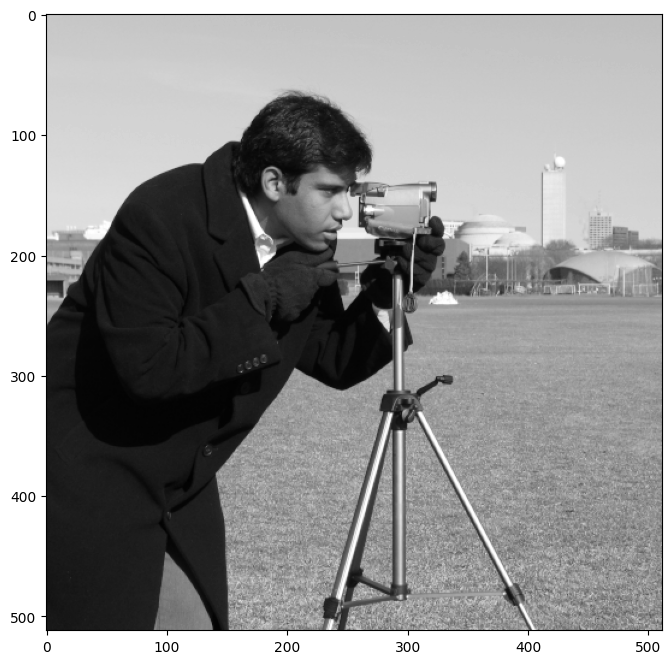

In [36]:
def plot_grayscale(img, h=8):
    plt.figure(figsize=(h, h))
    _=plt.imshow(img, cmap=plt.get_cmap('gray'))

camera_image = data.camera() 
print('Image size = ' + str(camera_image.shape))
plot_grayscale(camera_image)

To make the process of visualizing the transformations of image easier a dark margin will be added to the image. Execute the code in the cell below to place the image on the background and to display the result.   

Shape of the background = (1024, 1024)


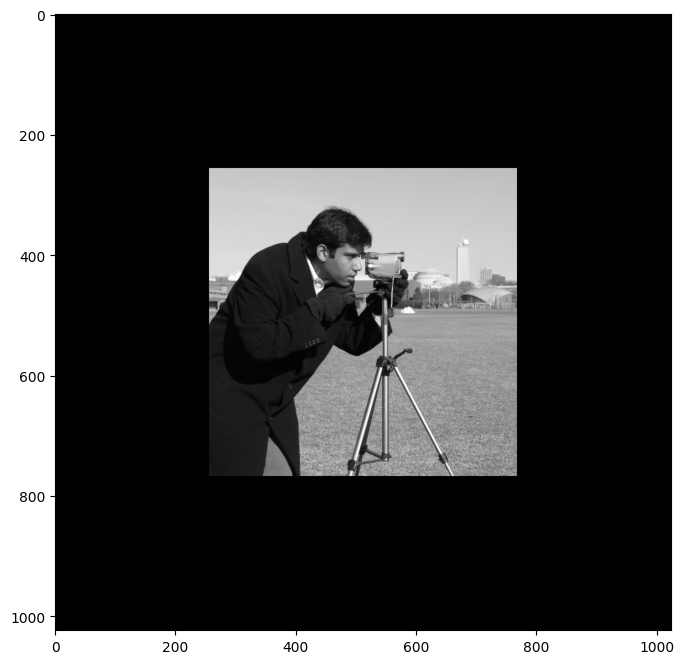

In [37]:
half_margin = 256
background = np.zeros((camera_image.shape[0] + 2*half_margin, camera_image.shape[1] + 2*half_margin)).astype('int')
print('Shape of the background = ' + str(background.shape))

camera_image_background = background
#camera_image_background[2*half_margin:camera_image_background.shape[0], 0:camera_image_background.shape[1]-2*half_margin] = camera_image
camera_image_background[half_margin:camera_image_background.shape[0] - half_margin, half_margin:camera_image_background.shape[1]-half_margin] = camera_image
plot_grayscale(camera_image_background)

> **Note:** Unless otherwise specified, use this gray scale image for the following exercises. 

## Euclidean Transformation

The Euclidean transformation involves only rotation and translation. The shape of objects is preserved by the Euclidean transformation.     

> **Exercise 9-1:** You will now apply the Euclidean transformation to the image with the margin background. Perform the following steps:   
> 1. Create a Numpy transformation matrix for a rotation of $\pi/8$, with no translation, using homogeneous coordinates.   
> 2. Display the transformation matrix.  
> 3. Apply your transformation matrix to the image using the [skimage.transform.warp](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp) function, and display the result. You can see the conventions used by Scikit-Image in the documentation for the [skimage.transform.EuclideanTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.EuclideanTransform) function.  

In [51]:
# This function prints the transformation matrix, applies it to the image and displays the result.
def process_image(matrix):
    # Display the transformation matrix.
    print(matrix)

    # Apply transformation matrix to the image.
    image = transform.warp(camera_image_background, matrix)

    # Display result.
    plot_grayscale(image)

[[ 0.92387953 -0.38268343  0.        ]
 [ 0.38268343  0.92387953  0.        ]
 [ 0.          0.          1.        ]]


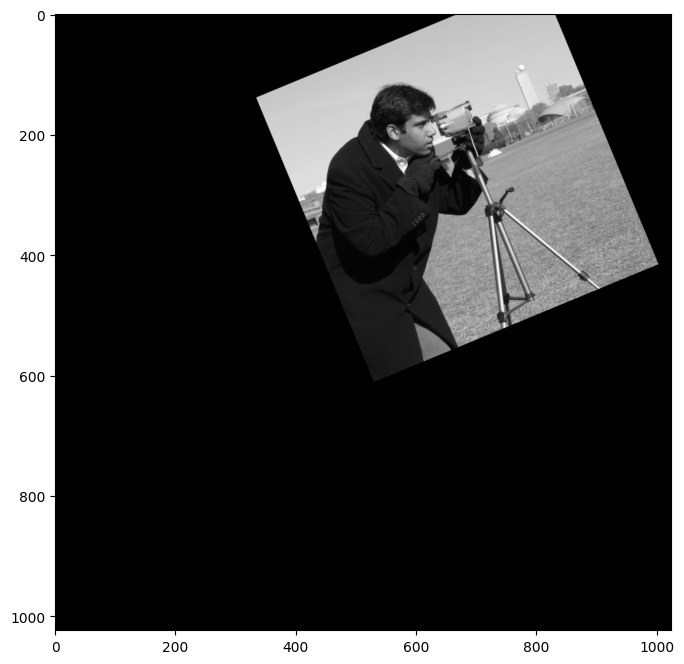

In [52]:
## Put your code below

# 1. Create a Numpy transformation matrix for a rotation of pi/8, with no translation, using homogeneous coordinates.  
angle = pi / 8
euclidean_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                             [np.sin(angle),  np.cos(angle), 0],
                             [            0,              0, 1]])

# 2. Display the transformation matrix.
# 3. Apply your transformation matrix to the image using the skimage.transform.warp function, and display the result. You
#    can see the conventions used by Scikit-Image in the documentation for the skimage.transform.EuclideanTransform function.  
process_image(euclidean_matrix)

> 4. Next create a new Numpy transformation matrix in homogeneous coordinates with the same rotation of $\pi/8$, but with a translation vector of $[256, -128]^T$. 
> 5. Display the new transformation matrix.   
> 6. Apply your transformation matrix to the image and display the result.  

[[   0.92387953   -0.38268343  256.        ]
 [   0.38268343    0.92387953 -128.        ]
 [   0.            0.            1.        ]]


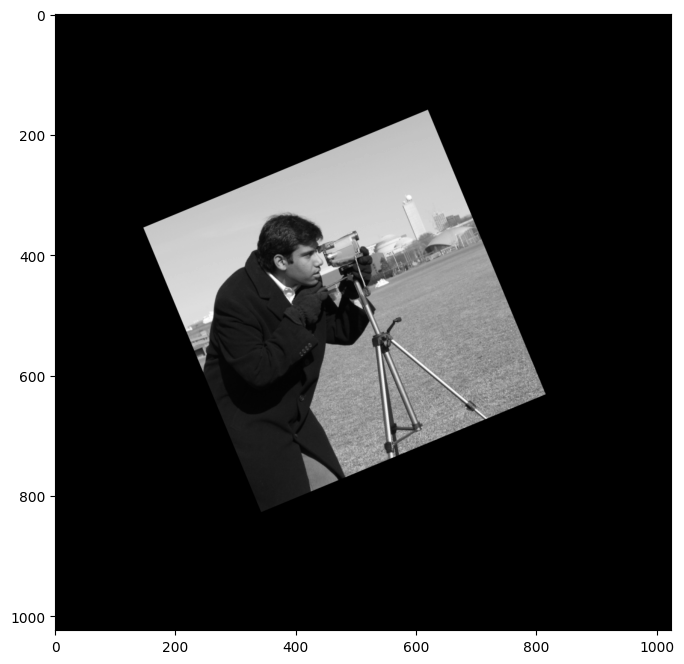

In [53]:
## Put your code below

# 4. Next create a new Numpy transformation matrix in homogeneous coordinates with the same rotation of pi/8, but with a translation vector of [256, -128]^T.
euclidean_matrix = np.array([[np.cos(angle), -np.sin(angle),  256],
                             [np.sin(angle),  np.cos(angle), -128],
                             [            0,              0,    1]])

# 5. Display the transformation matrix.
# 6. Apply your transformation matrix to the image and display the result.
process_image(euclidean_matrix)


> 7. Finally, you can check your transformation matrix by using the [skimage.transform.EuclideanTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.EuclideanTransform) function, using the rotation angle and translation vector. Compute and display the transformation matrix, in homogeneous coordinates, using the arguments specified in step 4 of this exercise.   

<EuclideanTransform(matrix=
    [[   0.92387953,   -0.38268343,  256.        ],
     [   0.38268343,    0.92387953, -128.        ],
     [   0.        ,    0.        ,    1.        ]])>


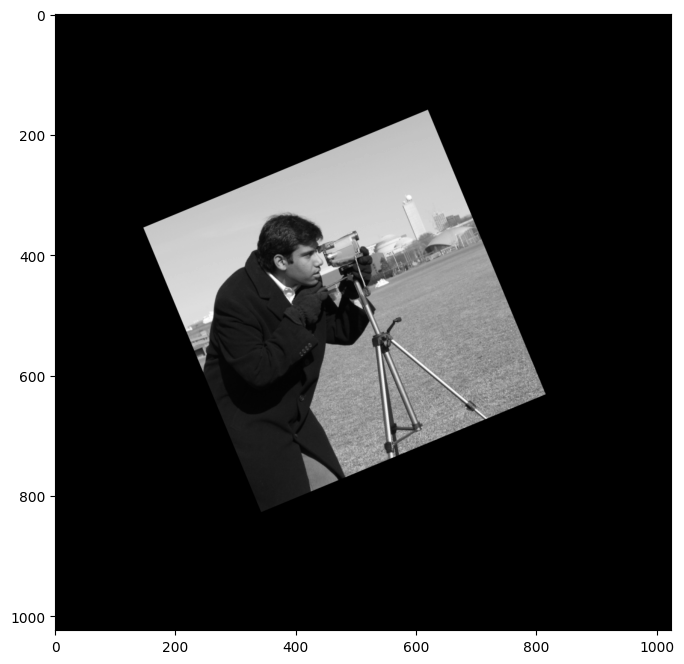

In [54]:
## Put your code below

# 7. Finally, you can check your transformation matrix by using the skimage.transform.EuclideanTransform function, using 
#    the rotation angle and translation vector. Compute and display the transformation matrix, in homogeneous coordinates,
#    using the arguments specified in step 4 of this exercise.
process_image(transform.EuclideanTransform(rotation=angle, translation=[256, -128]))

> In one or two sentences answer the following questions:   
> 1. Examine the image displayed in step 3. Keeping in mind that the origin of the image display is in the upper left corner, does the rotated image appear as you expected and why?  
> 2. How does the addition of a translation change the result of the transformation.   
> 3. Compare the transformation matrix you computed for step 4 with the matrix computed in step 7. Are these transformation matrices the same?  
> **End of exercise.**

> **Answers:**     

> 1. The rotated image appears as expected. The image is rotated clockwise by $\pi/8$ radians taking as origin the upper left corner. It is important to note that the image includes the black margins.

> 2. The addition of the translation moves the image near the center after translating it by $256$ pixels in the $x$ direction and by $-128$ pixels in the $y$ direction.

> 3. Yes, the matrices are the same and the resulting image is the same too.

## Similarity Transform

You will now extend the generality of the transformation by adding a change of scale. A similarity transformation can perform rotation, translation as scale. The like the Euclidean transform, the similarity transform preserves shape.   

> **Exercise 9-2:**  You will now do the following to explore the properties of the similarity transform: 
> 1. Create a Numpy transformation matrix in homogeneous coordinates with:  
>   - Rotation of $\pi/8$.  
>   - Translation vector of of $[128,0]^T$.   
>   - Scale of 0.5. Keep in mind that the scale argument to the `transform.warp` function is applied as $1.0/scale$ to each of the rotation matrix elements. The covention used for similarity transforms in Scikit-Image can be found in the documentation of the [skimage.transform.SimilarityTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.SimilarityTransform) function.    
> 2. Display the transformation matrix.   
> 3. Apply your transformation matrix to the image and display the result.  

[[  1.84775907  -0.76536686 128.        ]
 [  0.76536686   1.84775907   0.        ]
 [  0.           0.           1.        ]]


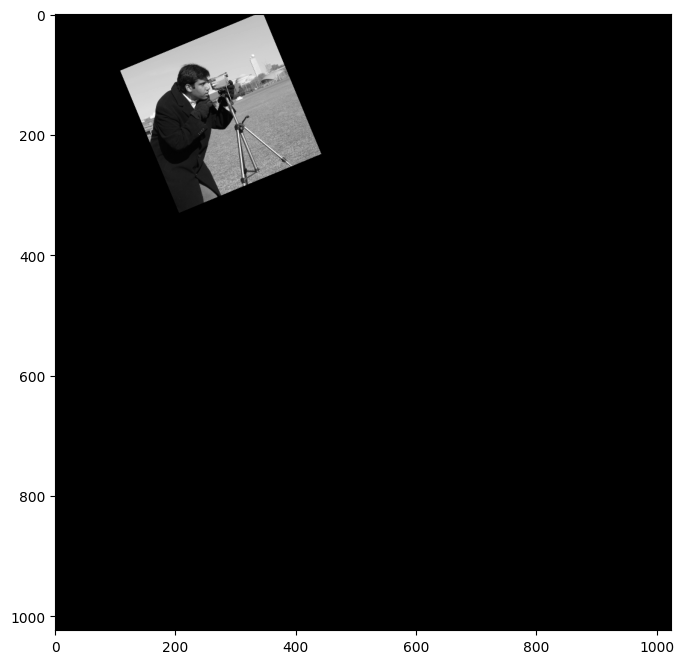

In [56]:
## Put your code below

# 1. Create a Numpy transformation matrix in homogeneous coordinates with:  
#   - Rotation of pi/8.  
#   - Translation vector of [128,0]^T.   
#   - Scale of 0.5. Keep in mind that the scale argument to the `transform.warp` function is applied as 1.0/scale to 
#     each of the rotation matrix elements. The covention used for similarity transforms in Scikit-Image can be found 
#     in the documentation of the skimage.transform.SimilarityTransform function. 
scale = 0.5
similarity_matrix = np.array([[np.cos(angle) / scale, -np.sin(angle) / scale, 128],
                              [np.sin(angle) / scale,  np.cos(angle) / scale,   0],
                              [                    0,                      0,   1]])

# # 2. Display the transformation matrix.
# # 3. Apply your transformation matrix to the image and display the result.
process_image(similarity_matrix)

> 4. You can check your transformation matrix by using the [skimage.transform.SimilarityTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.SimilarityTransform) function, using the rotation angle, translation vector and scale (using the inverse). Compute and display the transformation matrix, in homogeneous coordinates, using the arguments specified in step 1 of this exercise.

<SimilarityTransform(matrix=
    [[  1.84775907,  -0.76536686, 128.        ],
     [  0.76536686,   1.84775907,   0.        ],
     [  0.        ,   0.        ,   1.        ]])>


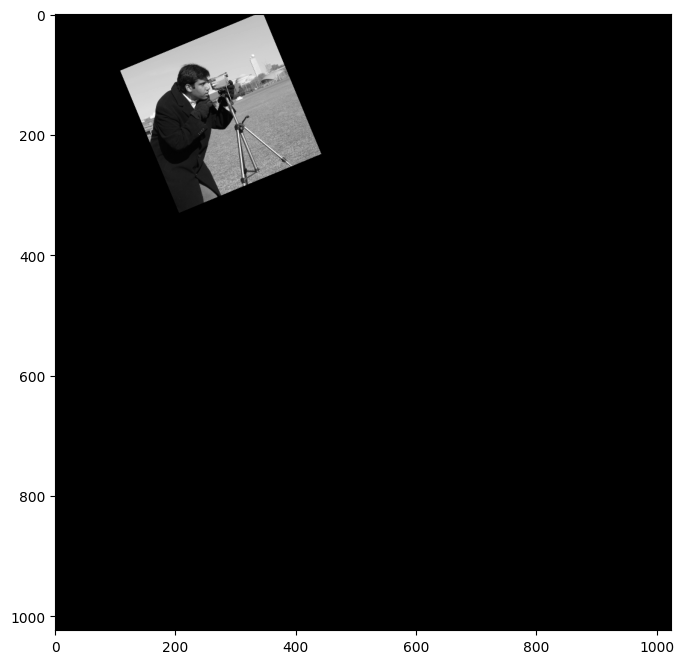

In [57]:
## Put your code below

# 4. You can check your transformation matrix by using the skimage.transform.SimilarityTransform function, using the 
#    rotation angle, translation vector and scale (using the inverse). Compute and display the transformation matrix, 
#    in homogeneous coordinates, using the arguments specified in step 1 of this exercise.
process_image(transform.SimilarityTransform(rotation=angle, translation=[128, 0], scale=1/0.5))

> In one or two sentences answer the following questions. 
> 1. Compare the image size and shape against the original image size. Does the transform appear to be correctly applied and why?   
> 2. Is the homogeneous transformation matrix you computed identical to the one computed with the `SimilarityTransform` function? 
> **End of exercise.**

> **Answer:**     

> 1. Yes, the transform is correctly applied. The image size is reduced by a factor of 2, rotated by $\pi/8$ radians, translated by $128$ pixels in the $x$ direction, and scaled by a factor of 0.5, while the shape is preserved.   

> 2. Yes, the homogeneous transformation matrix is identical to the one computed with the `SimilarityTransform` function.    

## Affine Transform

Continuing to generalize the transformation you will now add a shear factor to the transformation. An affine transformation can perform rotation, translation, scaling and shear. The affine transformation preserves parallel lines.   

> **Exercise 9-3:**  You will now do the following to explore the properties of the affine transform following the convention used in the [skimage.transform.AffineTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform) function: 
> 1. Create a Numpy transformation matrix in homogeneous coordinate with:   
>   - Rotation of $\pi/8$. Keep in mind that the scale is applied as $1.0/scale$ to each of the rotation matrix elements.  
>   - Translation vector of $[256,-256]^T$. The first element of the inverse scale is applied to the x-axis rotations and the second element to the y-axis rotations.   
>   - Scale vector of $[0.8, 0.4]$.   
>   - Shear angle of $\pi/6$. Shear is added to the y-axis rotation angle.   
> 2. Display the transformation matrix.   
> 3. Apply your transformation matrix to the image and display the result.  

[[   1.15484942   -1.98338335  256.        ]
 [   0.47835429    1.52190357 -256.        ]
 [   0.            0.            1.        ]]


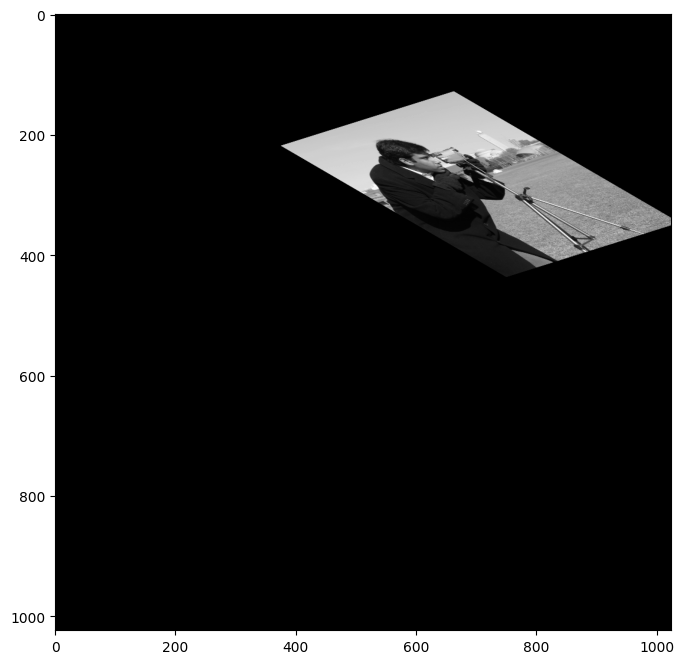

In [60]:
## Put your code below

# 1. Create a Numpy transformation matrix in homogeneous coordinate with:
#    - Rotation of pi/8. Keep in mind that the scale is applied as 1.0/scale to each of the rotation matrix elements. 
#    - Translation vector of [256,-256]^T. The first element of the inverse scale is applied to the x-axis rotations and the second element to the y-axis rotations.
#    - Scale of [0.8, 0.4].
#    - Shear angle of pi/6. Shear is added to the y-axis rotation angle.
scale = (0.8, 0.4)
shear = pi / 6
affine_matrix = np.array([[np.cos(angle) / scale[0], -np.sin(angle + shear) / scale[1],  256],
                          [np.sin(angle) / scale[0],  np.cos(angle + shear) / scale[1], -256],
                          [                       0,                                 0,    1]])

# 2. Display the transformation matrix.
# 3. Apply your transformation matrix to the image and display the result.
process_image(affine_matrix)

> 4. You can check your transformation matrix by using the [skimage.transform.AffineTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform) function, using the rotation angle, translation vector and scale (not the inverse). Compute and display the transformation matrix, in homogeneous coordinates, using the arguments specified in step 1 of this exercise.

<AffineTransform(matrix=
    [[   1.15484942,   -1.98338335,  256.        ],
     [   0.47835429,    1.52190357, -256.        ],
     [   0.        ,    0.        ,    1.        ]])>


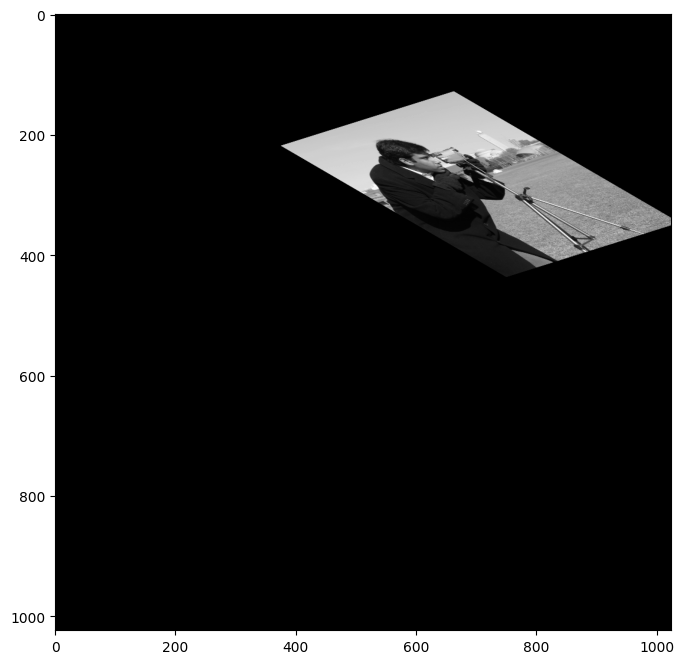

In [61]:
## Put your code below

#4. You can check your transformation matrix by using the skimage.transform.AffineTransform function, using the 
# rotation angle, translation vector and scale (not the inverse). Compute and display the transformation matrix, 
# in homogeneous coordinates, using the arguments specified in step 1 of this exercise.
process_image(transform.AffineTransform(rotation=angle, translation=[256,-256], scale=(1/0.8, 1/0.4), shear=pi/6))

> In one or two sentences answer the following questions. 
> 1. Compare the image size and shape against the original image size. Does the transform appear to be correctly applied and why?   
> 2. Is the homogeneous transformation matrix you computed identical to the one computed with the `AffineTransform` function? 
> **End of exercise.**

> **Answer:**    

> 1. Yes, the transform is correctly applied. The image size is reduced by 80% in the x axis and 40% in the y axis, rotated the image on the Y axis by $\pi/8$ radians, translated by $256$ pixels in the $x$ axis and by $-256$ pixels in the $y$ axis, and the shear applied was $\pi/6$ radians. The final result preserves the characteristics expected from an affine transformation.   

> 2. Yes, the homogeneous transformation matrix is identical to the one computed with the `AffineTransform` function.

## Working with the Intrinsic Matrix

Up until now, you have been working only with the **extrinsic transformation matrix**, which defines the projection of an object on the image plane. The extrinsic properties of are also known as **camera pose**. These transformations do not account for inernal camera parameters.   

The **intrinsic matrix** is used to model camera specific characteristics. Here we will only deal with one camera parameter, the focal length. Focal length is typically denoted $[\phi_x, \phi_y]$, for the x and y components, which can be independent. The differences in x and y can arrise for a number of reasons, such as asymmetry of the camera sensor. In Cartesian coordinates, for a basic pinhole camera the object location, $[x,y,w]$, maps to the $[x,y]$ location on the image plane by the following relationships:   

$$[x,y] = \Bigg[\frac{\phi_x\ u}{w},\frac{\phi_y\ v}{w} \Bigg]$$


> **Exercise 9-4:** You will now apply an intrinsic matrix for two different camera focal lengths by the following steps:  
> 1. Define a Numpy extrinsic transform matrix in homogeneous coordinates with rotation $= 0$, translation $[-512,-512]$, no rotation, no scaling, and no shear.  
> 2. Define an intrinsic matrix in homogeneous coordinates with focal length $[\omega_x, \omega_y]=[2.0, 2.0]$, array offset of 0, and skew correction of 0.  
> 3. Perform matrix multiplication between the transform matrix by the intrinsic matrix using [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).
> 4. Print the resulting product of the transformation matrix. 
> 5. Apply the resulting transformation product to the image and display the result. 

In [ ]:
## Put your code below









> 6. Define a Numpy extrinsic transform matrix in homogeneous coordinates with rotation $= 0$, translation $[256,256]$, no roation, no scaling, and no shear.  
> 7. Define an intrinsic matrix in homogeneous coordinates with focal length $[\omega_x, \omega_y]=[0.5, 0.5]$, array offset of 0, and skew correction of 0.  
> 8. Perform matrix multiplication between the transform matrix by the intrinsic matrix using [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html). 
> 9. Print the resulting product of the transformation matrix. 
> 10. Apply the resulting transformation product to the image and display the result. 

In [ ]:
## Put your code below







> In one or two sentences answer the following questions.  
> 1. Examine the upper left 4 elements of the first complete transformation matrix for focal length of 2.0. What does the diagonal and off diagonal elements of these terms tell you about the properties of the resulting transformed image?  
> 2. Examine the first transformed image. Does this image appear as it should and why? 
> 3. Examine the upper left 4 elements of the second complete transformation matrix for focal length of 0.5. What does the diagonal and off diagonal elements of these terms tell you about the properties of the resulting transformed image? 
> 4. Examine the second transformed image. When compared to the image with focal length of 2.0 is the transformed image with focal length of 0.5 consistent with the change in focal length? 
> **End of exercise**. 

> **Answers:**  
> 1.      
> 2.      
> 3.    
> 4.   

## Projective transform

Projective transforms are the most general planar transformations. Here we will only deal with some simple examples, which are equivalent to changing the camera position. 

In homogenous coordinates, we define the projective transformation matrix as the product of the intrinsic matrix and the extrinsic matrix:  

$$
\Omega \Lambda = 
\begin{bmatrix}
   \phi_{11}  & \phi_{12} & \phi_{13} \\
    \phi_{21}  & \phi_{22} & \phi_{23} \\
    \phi_{31}  & \phi_{32} & \phi_{33}
\end{bmatrix}
= \begin{bmatrix}
   \phi_1  & \gamma & \delta_x \\
   0  & \phi_2 & \delta_y \\
    0  & 0 & D
\end{bmatrix}
\begin{bmatrix}
   \omega_{11}  & \omega_{12} & \tau_x \\
    \omega_{21}  & \omega_{22} & \tau_y \\
    \omega_{31}  & \omega_{32} & \tau_z
\end{bmatrix}
$$

For the following exercise you will work with a picture of a piece of furniture in the interior of a house. To load and prepare this image execute the code in the cell below.  

In [ ]:
chest = Image.open('../datafiles/chest.JPG')
chest = np.array(chest)
print('Iinital image shape = ' + str(chest.shape))

chest = rgb2gray(chest)
chest = transform.resize(chest, (300,400))
print('Final image shape = ' + str(chest.shape))

plot_grayscale(chest)

For the following exercises, you will compute a full projective transform matix as the product of an intrinsic matrix and an extrinsic matrix. You will then apply the projective transform to the image shown above.   

> **Exercise 9-5:** As a first step to get a feel for projective transformations, do the following. 
> 1. Create an intrinsic camera matrix as a Numpy array with 1.0 on the diagonal and 0.0 everywhere else, or a $3 \times 3$ identify matrix.  
> 2. Create an extrinsic Numpy transformation matrix with the following properties:   
>   - $[\tau_x, \tau_y, tau_z] = [-32,0,1.0]$
>   - The lower left element $=-0.001$, which roughly speaking moves the camera pose horizontally   
>   - No rotation or shear    
> 3. Compute and print the fully projective transformation matrix. 
> 4. Apply the transformation matrix to the chest image and display the result. 

In [ ]:
## Put your code below






> Answer the following quesitons:   
> 1. In one or two sentences, how can you qualitatively describe the change in the apparent camera pose with respect to the original image resulting from this transformation?  
> 2. Examine the projective transformation marix. Given the simple diagonal structure of the intrinsic camera matrix, is this result expected and why?    

> **Answers:**     
> 1.      
> 2.     

> **Exercise 9-6:** To continue your exploration of the projective transform, do the following. 
> 1. Create an intrinsic camera matrix as a Numpy array with 1.0 on the diagonal and 0.0 everywhere else.  
> 2. Create an extrinsic Numpy transformation matrix with the following properties:    
>   - $[\tau_x, \tau_y, tau_z] = [-64,0,0.6]$
>   - The lower left element $=-0.001$, which roughly speaking moves the camera pose horizontally  
>   - The lower middle element $= 0.002$, which roughtly speaking moves the camera pose vertically   
>   - No rotation or shear     
> 3. Compute and print the fully projective transformation matrix. 
> 4. Apply the transformation matrix to the chest image and display the result. 

In [ ]:
## Put your code below
  
    
    
    
    

> In one or two sentences, how can you qualitatively describe the change in the apparent camera pose with respect to the original image resulting from this transformation? 

> **Answer:**     

> **Exercise 9-7:** To continue your exploration of the projective transform, do the following. 
> 1. Create an intrinsic camera matrix as a Numpy array with 1.0 on the diagonal and 0.0 everywhere else, except an image plane skew, as $\gamma = -0.3$.  
> 2. Create an extrinsic Numpy transformation matrix with the following properties:             
>   - $[\tau_x, \tau_y, \tau_z] = [-128, 16, 0.5]$
>    - The lower left element $=-0.001$, which roughly speaking moves the camera pose horizontally  
>    - The lower middle element $= 0.002$, which roughtly speaking moves the camera pose vertically   
>    - Rotation angle of $-\pi/20.0$    
>    - Camera pose shear $=-0.3$
> 3. Compute and print the fully projective transformation matrix. 
> 4. Apply the transformation matrix to the chest image and display the result. 

In [ ]:
## Put your code below











> Answer the following quesitons:   
> 1. In one or two sentences, how can you qualitatively describe the change in the apparent camera pose with respect pose in the pervious exercise?  
> 2. Examine the projective transformation marix. How does this matrix differ from the one you examined for Exercise 8.5 and what does this tell you about the non-linearity of the response to parameters of the extrinsic matrix?    

> **Answers:**     
> 1.       
> 2.     

####  Copyright 2022, 2023, Stephen F Elston. All rights reserved. 